# **Forest Fire Detection Using Convolutional Neural Network**

---



link to dataset: https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download brsdincer/wildfire-detection-image-data

 88% 22.0M/24.9M [00:02<00:00, 16.1MB/s]
100% 24.9M/24.9M [00:02<00:00, 11.7MB/s]


In [7]:
! unzip wildfire-detection-image-data.zip

Archive:  wildfire-detection-image-data.zip
  inflating: forest_fire/Testing/fire/abc169.jpg  
  inflating: forest_fire/Testing/fire/abc170.jpg  
  inflating: forest_fire/Testing/fire/abc171.jpg  
  inflating: forest_fire/Testing/fire/abc172.jpg  
  inflating: forest_fire/Testing/fire/abc173.jpg  
  inflating: forest_fire/Testing/fire/abc174.jpg  
  inflating: forest_fire/Testing/fire/abc175.jpg  
  inflating: forest_fire/Testing/fire/abc176.jpg  
  inflating: forest_fire/Testing/fire/abc177.jpg  
  inflating: forest_fire/Testing/fire/abc178.jpg  
  inflating: forest_fire/Testing/fire/abc179.jpg  
  inflating: forest_fire/Testing/fire/abc180.jpg  
  inflating: forest_fire/Testing/fire/abc181.jpg  
  inflating: forest_fire/Testing/fire/abc182.jpg  
  inflating: forest_fire/Testing/fire/abc183.jpg  
  inflating: forest_fire/Testing/fire/abc184.jpg  
  inflating: forest_fire/Testing/fire/abc185.jpg  
  inflating: forest_fire/Testing/fire/abc186.jpg  
  inflating: forest_fire/Testing/fire/

Making saperate datasets for training and testing

In [9]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/forest_fire/Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/forest_fire/Testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [10]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

Model Building

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model

In [13]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 14s 75ms/step - loss: 0.3231 - accuracy: 0.8592 - val_loss: 0.2551 - val_accuracy: 0.9118
Epoch 2/10
58/58 [==============================] - 4s 65ms/step - loss: 0.1496 - accuracy: 0.9509 - val_loss: 0.6812 - val_accuracy: 0.7941
Epoch 3/10
58/58 [==============================] - 4s 64ms/step - loss: 0.1627 - accuracy: 0.9481 - val_loss: 0.2473 - val_accuracy: 0.8971
Epoch 4/10
58/58 [==============================] - 4s 63ms/step - loss: 0.1300 - accuracy: 0.9580 - val_loss: 0.2730 - val_accuracy: 0.8676
Epoch 5/10
58/58 [==============================] - 4s 65ms/step - loss: 0.1192 - accuracy: 0.9623 - val_loss: 0.1629 - val_accuracy: 0.9412
Epoch 6/10
58/58 [==============================] - 4s 65ms/step - loss: 0.0923 - accuracy: 0.9662 - val_loss: 0.1272 - val_accuracy: 0.9265
Epoch 7/10
58/58 [==============================] - 4s 64ms/step - loss: 0.0868 - accuracy: 0.9705 - val_loss: 0.1208 - val_accuracy: 0.9706
Epoch 8/10
5

Predicting on Test Dataset

In [14]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 33ms/step


In [15]:
predictions

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [16]:
print(len(predictions))

68


Plotting loss per iteration

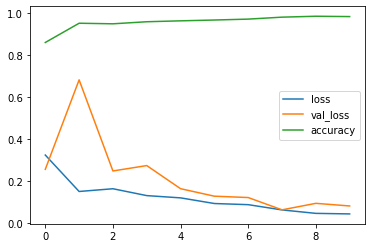

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

Plotting accuracy per iteration

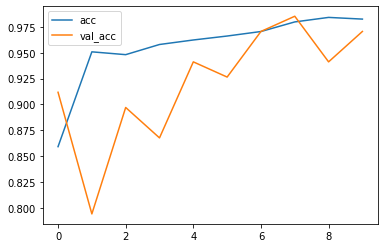

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [19]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 28ms/step
[[1.]]


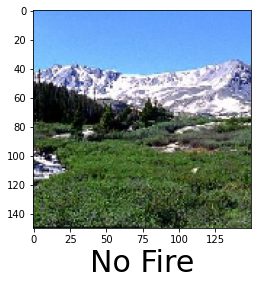

In [22]:
predictImage("/content/forest_fire/Testing/nofire/abc337.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


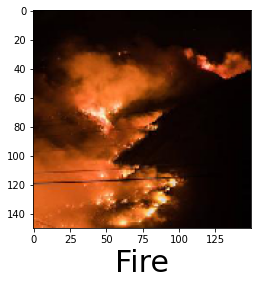

In [23]:
predictImage('/content/forest_fire/Testing/fire/abc177.jpg')

1/1 [==============================] - 0s 18ms/step
[[1.]]


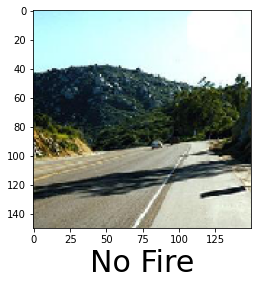

In [24]:
predictImage('/content/forest_fire/Testing/nofire/abc356.jpg')

1/1 [==============================] - 0s 17ms/step
[[1.]]


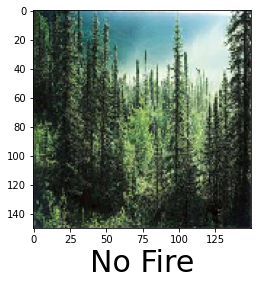

In [25]:
predictImage('/content/forest_fire/Testing/nofire/abc378.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


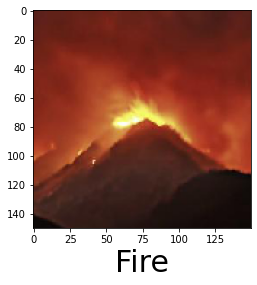

In [27]:
predictImage('/content/forest_fire/Testing/fire/abc179.jpg')

1/1 [==============================] - 0s 16ms/step
[[1.]]


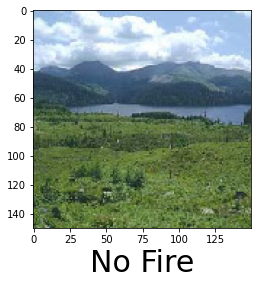

In [26]:
predictImage('/content/forest_fire/Testing/nofire/abc368.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


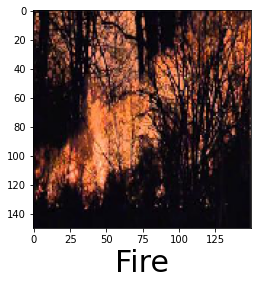

In [28]:
predictImage('/content/forest_fire/Testing/fire/abc189.jpg')



-----



# Final Thoughts



1.   Model is well performing in testing.
2.   The model can be improved further more as the graphs showing accuracy and loss are bit messy.
3.   Transfer Learning can be used to reduce the learning/training time significantly.







---

